In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path='eye_frames/left/135__thres_48.jpg'


In [3]:
eye_frame=cv2.imread(path)

In [4]:
type(eye_frame)

numpy.ndarray

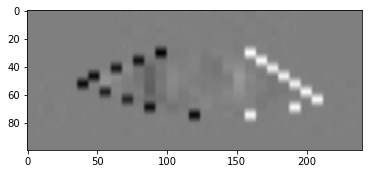

In [6]:
eye=cv2.cvtColor(eye_frame,cv2.COLOR_BGR2GRAY)
#eye = cv2.fastNlMeansDenoising(eye,None,200.0, 7, 21)

eye = cv2.resize(eye,(240,100))
eye = cv2.Sobel(eye,cv2.CV_64F,1,0,ksize=3)
#eye=cv2.Canny(eye,0,255)
plt.imshow(eye,'gray')
plt.show()

In [7]:
kernel = np.ones((3, 3), np.uint8)
a = cv2.bilateralFilter(eye_frame, 10, 15, 15)
b = cv2.erode(a, kernel, iterations=3)
c = cv2.threshold(b, 26, 255, cv2.THRESH_BINARY)[1]

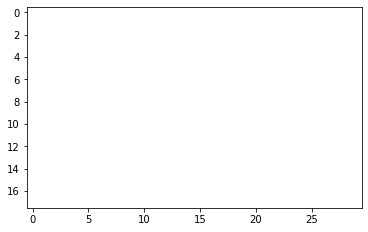

In [8]:
c=cv2.cvtColor(c,cv2.COLOR_BGR2RGB)
plt.imshow(c)
plt.show()

[[[12.5  8.5  3.8]]]


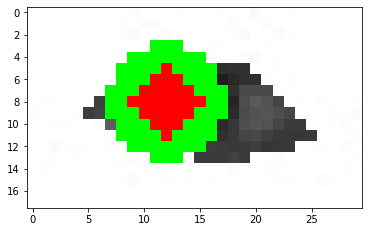

In [9]:
#HOUGH DETECTION

import cv2 
import numpy as np 
  
eye_frame=cv2.imread(path)
img=eye_frame  
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   
gray_blurred = cv2.blur(gray, (3, 3))   
detected_circles = cv2.HoughCircles(gray,  
                   cv2.HOUGH_GRADIENT, 1, 20, param1 =5, 
               param2 = 1, minRadius = 1, maxRadius = 20) 
print(detected_circles)
if detected_circles is not None:   
    detected_circles = np.uint16(np.around(detected_circles)) 
    for pt in detected_circles[0, :]: 
        a, b, r = pt[0], pt[1], pt[2]   
        cv2.circle(img, (a, b), r, (0, 255, 0), 2) 
        cv2.circle(img, (a, b), 1, (0, 0, 255), 3) 
        c=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        plt.imshow(c)
        plt.show()
        #cv2.imshow("Detected Circle", img) 
        #cv2.waitKey(0) 

In [10]:
# WATERSHED

img = cv2.imread(path)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

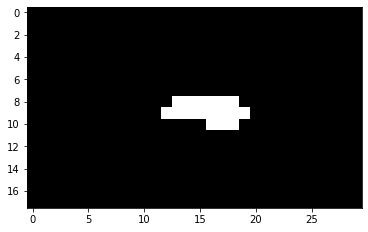

In [11]:
c=cv2.cvtColor(sure_fg,cv2.COLOR_GRAY2RGB)
plt.imshow(c)
plt.show()

In [ ]:
#GRAB CUT

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread(path)
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (0,0,33,66)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

In [14]:
img.shape

(18, 30, 3)

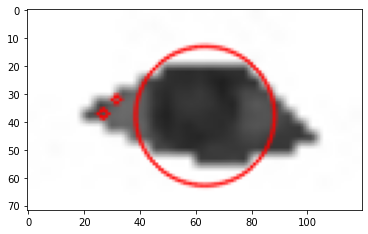

In [15]:
#BLOB DETECTION
%matplotlib inline

path='eye_frames/left/135__thres_48.jpg'
#path='coins.jpg'


import cv2
import numpy as np;
import matplotlib.pyplot as plt
 
# Read image
m=4
im = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
im = cv2.resize(im,(int(im.shape[1]*m),int(im.shape[0]*m)))
# Set up the detector with default parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 0
params.maxThreshold = 50000


# Filter by Area.
params.filterByArea = 1
params.minArea = 0

# Filter by Circularity
params.filterByCircularity = 0
params.minCircularity = 1

# Filter by Convexity
params.filterByConvexity = 0
params.minConvexity = 0.0

# Filter by Inertia
params.filterByInertia = 0
params.minInertiaRatio = 0

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)
 
# Detect blobs.
keypoints = detector.detect(im)
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
# Show keypoints
c=cv2.cvtColor(im_with_keypoints,cv2.COLOR_BGR2RGB)
plt.imshow(c)
plt.show()

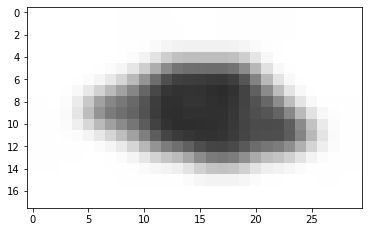

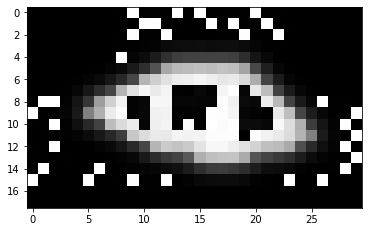

In [16]:
img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
blur = cv2.GaussianBlur(img,(5,5),0)
new=img-blur
c=cv2.cvtColor(blur,cv2.COLOR_GRAY2RGB)
plt.imshow(c)
plt.show()

c=cv2.cvtColor(new,cv2.COLOR_GRAY2RGB)
plt.imshow(c)
plt.show()

In [38]:
img.shape

(18, 30, 3)

In [36]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread(path)
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,5),np.float64)
fgdModel = np.zeros((1,5),np.float64)

#rect = (5,5,20,20)
rect = (8, 5, 15,6)


In [ ]:
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img)
plt.colorbar()
plt.show()

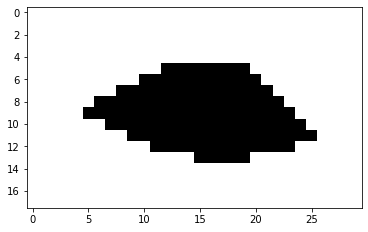

In [19]:
img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
ret, mask = cv2.threshold(img, 245, 255, cv2.THRESH_BINARY)
c=cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
plt.imshow(mask,cmap='gray')
plt.show()

In [20]:
(mask).shape

(18, 30)

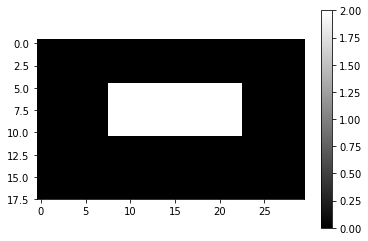

(<matplotlib.image.AxesImage at 0x1a8554c54e0>,
 None)

In [34]:
img=cv2.imread(path)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
#mask = np.zeros(img.shape[:2],np.uint8)

#rect = (0,0,33,66)
rect = (8, 5, 15,6)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,50,cv2.GC_INIT_WITH_RECT)


plt.imshow(mask,cmap='gray'),plt.colorbar(),plt.show()

In [35]:
img.shape

(18, 30, 3)